In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n8/n816.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n810.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8016.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n809.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n801.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n806.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n804.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n811.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n815.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n813.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8011.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8012.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8031.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8015.jpg
/kaggle/input/10-monk

In [2]:
import os   # import os module
import numpy as np # import numpy module
from keras.models import Sequential # import Sequential module from keras module    
from keras.layers import Activation, Dropout, Flatten, Dense # import Activation, Dropout, Flatten, Dense modules from keras module
from keras.preprocessing.image import ImageDataGenerator    # import ImageDataGenerator module from keras module
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D # import Conv2D, MaxPooling2D, ZeroPadding2D modules from keras module
from keras import optimizers # import optimizers module from keras module
import scipy # import scipy module for image processing and analysis  
import pylab as pl # import pylab module for plotting  
import matplotlib.cm as cm # import matplotlib.cm module for color mapping
%matplotlib inline    

input_shape = (150, 150, 3) # input shape for the model 
img_width, img_height = 150, 150 # input image dimensions for the model 

nb_train_samples = 1098 # number of training samples 
nb_validation_samples = 272 # number of validation samples
batch_size = 8 # batch size for training 
epochs = 25 # number of epochs for training 


train_data_dir = '/kaggle/input/10-monkey-species/training/training'  # path to training data directory
validation_data_dir = '/kaggle/input/10-monkey-species/validation/validation'  # path to validation data directory

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,              # normalize pixel values to [0,1]
    rotation_range = 30,           # randomly applies rotations
    width_shift_range = 0.3,       # randomly applies width shifting
    height_shift_range = 0.3,      # randomly applies height shifting
    horizontal_flip = True,        # randonly flips the image
    fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [3]:
# Creating out model
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        1

2022-08-16 15:16:51.759697: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 1098 // batch_size,
    epochs = 10, #number or epochs.
    validation_data = validation_generator,
    validation_steps = 272 // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-16 15:16:52.552716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
137/137 [==============================] - 94s 679ms/step - loss: 2.3406 - accuracy: 0.1055 - val_loss: 2.4053 - val_accuracy: 0.1029
Epoch 2/10
137/137 [==============================] - 79s 578ms/step - loss: 2.2929 - accuracy: 0.1532 - val_loss: 2.1493 - val_accuracy: 0.2721
Epoch 3/10
137/137 [==============================] - 78s 571ms/step - loss: 2.1929 - accuracy: 0.1927 - val_loss: 1.9331 - val_accuracy: 0.3088
Epoch 4/10
137/137 [==============================] - 79s 579ms/step - loss: 2.0846 - accuracy: 0.2596 - val_loss: 1.9446 - val_accuracy: 0.3529
Epoch 5/10
137/137 [==============================] - 79s 579ms/step - loss: 2.0122 - accuracy: 0.2688 - val_loss: 1.7045 - val_accuracy: 0.3897
Epoch 6/10
137/137 [==============================] - 79s 575ms/step - loss: 1.9171 - accuracy: 0.3064 - val_loss: 1.7418 - val_accuracy: 0.3382
Epoch 7/10
137/137 [==============================] - 79s 576ms/step - loss: 1.8764 - accuracy: 0.3229 - val_loss: 1.7033 - val_ac

In [5]:
history.history

{'loss': [2.3405773639678955,
  2.2928626537323,
  2.192946672439575,
  2.0845746994018555,
  2.0121912956237793,
  1.9171160459518433,
  1.876441478729248,
  1.8390191793441772,
  1.8156147003173828,
  1.8126219511032104],
 'accuracy': [0.1055045872926712,
  0.15321101248264313,
  0.19266055524349213,
  0.25963303446769714,
  0.2688073515892029,
  0.30642202496528625,
  0.3229357898235321,
  0.3238532245159149,
  0.3431192636489868,
  0.3403669595718384],
 'val_loss': [2.4053051471710205,
  2.149343967437744,
  1.9331130981445312,
  1.9445524215698242,
  1.7045416831970215,
  1.741837501525879,
  1.7032630443572998,
  1.5214934349060059,
  1.53317129611969,
  1.4282974004745483],
 'val_accuracy': [0.10294117778539658,
  0.2720588147640228,
  0.30882352590560913,
  0.3529411852359772,
  0.3897058963775635,
  0.3382352888584137,
  0.36764705181121826,
  0.46691176295280457,
  0.43014705181121826,
  0.5257353186607361]}

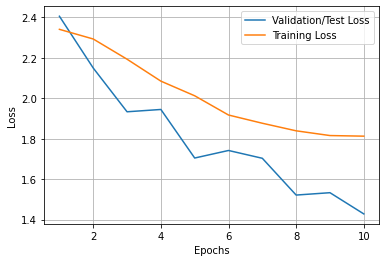

In [6]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
# plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
# plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

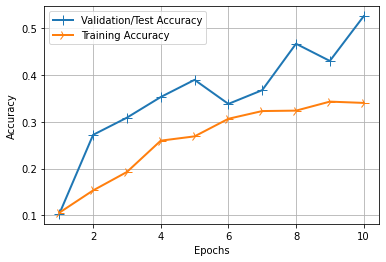

In [7]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


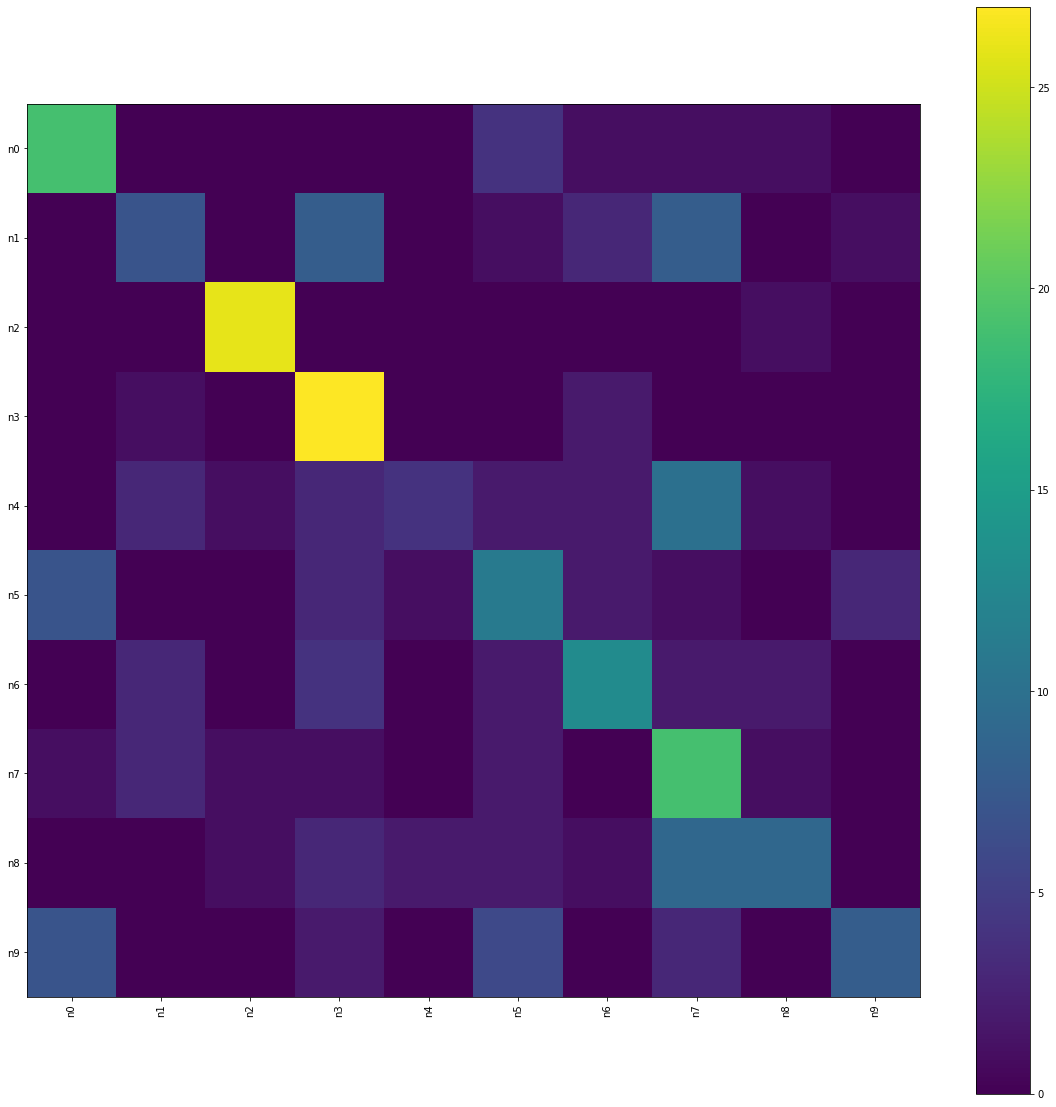

In [8]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 1098
nb_validation_samples = 272

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
class_labels = {0:'n0', 1:'n1', 2:'n2', 3:'n3', 4:'n4', 5:'n5', 6:'n6', 7:'n7', 8:'n8', 9:'n9'}
Y_pred = model.predict_generator(validation_generator,nb_validation_samples)
y_pred = np.argmax(Y_pred, axis =1)
print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes, y_pred))
print("Classification Report")
print(classification_report(validation_generator.classes, y_pred, target_names = target_names))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[19  0  0  0  0  4  1  1  1  0]
 [ 0  7  0  8  0  1  3  8  0  1]
 [ 0  0 26  0  0  0  0  0  1  0]
 [ 0  1  0 27  0  0  2  0  0  0]
 [ 0  3  1  3  4  2  2 10  1  0]
 [ 7  0  0  3  1 11  2  1  0  3]
 [ 0  3  0  4  0  2 13  2  2  0]
 [ 1  3  1  1  0  2  0 19  1  0]
 [ 0  0  1  3  2  2  1  9  9  0]
 [ 7  0  0  2  0  6  0  3  0  8]]
Classification Report
              precision    recall  f1-score   support

          n0       0.56      0.73      0.63        26
          n1       0.41      0.25      0.31        28
          n2       0.90      0.96      0.93        27
          n3       0.53      0.90      0.67        30
          n4       0.57      0.15      0.24        26
          n5       0.37      0.39      0.38        28
          n6       0.54      0.50      0.52        26
          n7       0.36      0.68      0.47        28
          n8       0.60      0.33      0.43        27
          n9       0.67      0.31      0.42        26

    accuracy                      